In [1]:
# Data manipulation
import pandas as pd #for tables
import numpy as np #for numbers and calculations

# Visualization
import matplotlib.pyplot as plt #make simple graphs
import seaborn as sns #make nicer/fancy graphs

# Machine learning
from sklearn.model_selection import train_test_split #splits data into training and testing
from sklearn.preprocessing import LabelEncoder #changes words to numbers
from sklearn.impute import SimpleImputer #fills missing values
from sklearn.linear_model import LogisticRegression #predicts yes or no
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #check how good the predictions are


In [2]:
# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

print("Train shape:", train.shape) #shape-rows and columns
print("Test shape:", test.shape)
print("Sample submission shape:", gender_submission.shape)

train.head() #first 5 rows

Train shape: (891, 12)
Test shape: (418, 11)
Sample submission shape: (418, 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#check missing values
train.isnull().sum()
#counts missing values per column

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


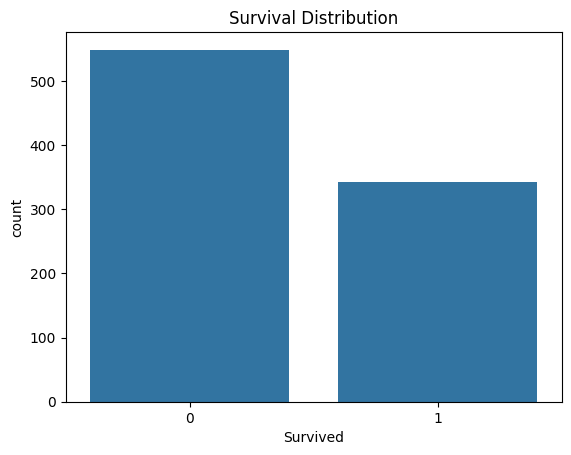

In [5]:
#survival by distribution
sns.countplot(data=train, x="Survived")#creates bar chart that counts how many times each value appears using the train dataset
plt.title("Survival Distribution")  #title added
plt.show() #displays the chart
 #o-not survived,1=survived

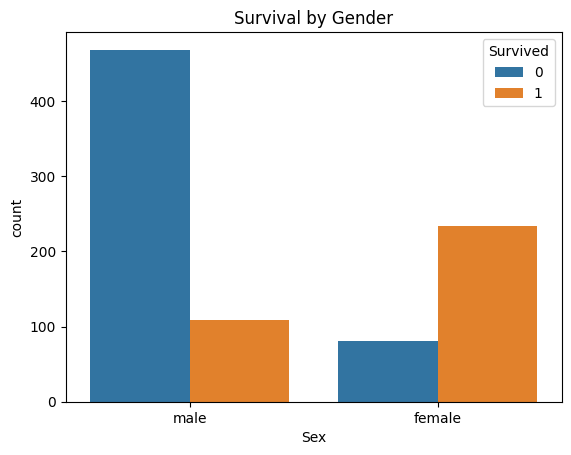

In [6]:
#survival by gender
sns.countplot(data=train, x="Sex", hue="Survived")#hue =adds different colors for each survival status
plt.title("Survival by Gender")
plt.show()


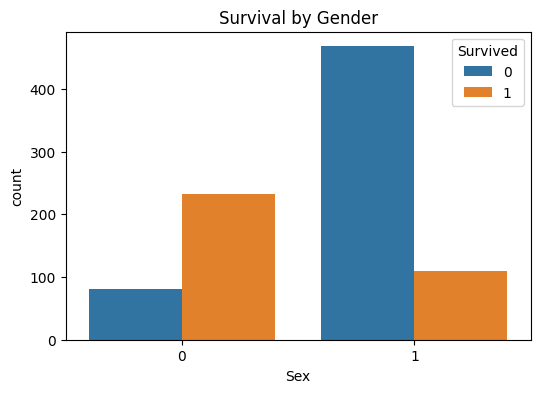

In [63]:
#saving the image
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the images folder exists
os.makedirs("images", exist_ok=True)

# Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Sex", hue="Survived")  # hue = adds survival split
plt.title("Survival by Gender")

# Save first
plt.savefig("images/survival_by_gender.png", dpi=300, bbox_inches="tight")

# Then show
plt.show()


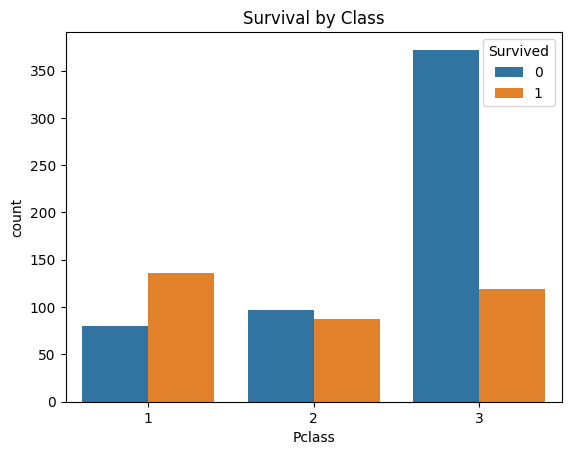

In [7]:
#survival by class
sns.countplot(data=train, x="Pclass", hue="Survived") #bars are grouped by passenger class
plt.title("Survival by Class")
plt.show()


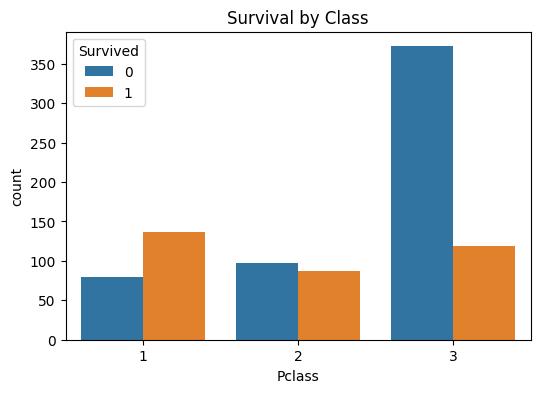

In [64]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the images folder exists
os.makedirs("images", exist_ok=True)

# Survival by class
plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Pclass", hue="Survived")  # bars grouped by class
plt.title("Survival by Class")

# Save before showing
plt.savefig("images/survival_by_class.png", dpi=300, bbox_inches="tight")
plt.show()


In [9]:
#handle missing values
train["Age"].fillna(train["Age"].median())
test["Age"].fillna(test["Age"].median())


,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,27.0
414,39.0
415,38.5
416,27.0


In [12]:
#fill missing embarked with mode
train["Embarked"].fillna(train["Embarked"].mode()[0])
test["Embarked"].fillna(test["Embarked"].mode()[0])
#fills the missing values with the most common value(mode-categorical values)

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


In [13]:
#Fill missing fare in test with median
test["Fare"].fillna(test["Fare"].median()) #numeric values
#fill missing values with the median fare (median keeps the data realistic)

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875
...,...
413,8.0500
414,108.9000
415,7.2500
416,8.0500


In [14]:
#drop cabin (too many missing values)
train.drop(columns=["Cabin"], inplace=True)
test.drop(columns=["Cabin"], inplace=True)

In [15]:
#feature creation Engineering:Familysize
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
#SibSp = siblings/spouses, Parch = parents/children.
#+1 → includes the passenger themselves.

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [21]:
#encode categorical variables
label = LabelEncoder() #label to numbers
train["Sex"] = label.fit_transform(train["Sex"]) #learns the mapping and applies it
test["Sex"] = label.transform(test["Sex"]) #applies the mapping learned
#if you use the same it will confuse the model so use the above mapping learned

train["Embarked"] = label.fit_transform(train["Embarked"])
test["Embarked"] = label.transform(test["Embarked"])
#if they are separate one can use later if you want to decode back to text

In [22]:
#split data for training
X = train.drop(columns=["Survived", "PassengerId", "Name", "Ticket"])
#X (features) → All the input data we’ll use to make predictions.
# drop "Survived" "PassengerId", "Name", "Ticket"
y = train["Survived"]
#y (target) → The column we want to predict
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#the variables                  #the function           #20%for validation  #ensures the split is always the same each time you run it
                                                        #80% for training

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



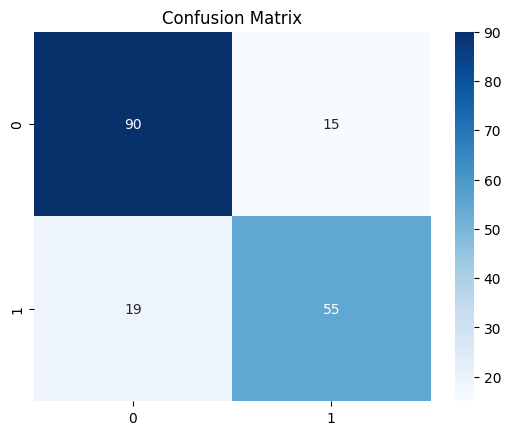

In [23]:
#Train the model using logical regression
model = LogisticRegression(max_iter=1000)
#LogisticRegression() → A classification algorithm (good for yes/no predictions)
#max_iter=1000 → Increases the number of training steps so it converges (sometimes the default is too low).
model.fit(X_train, y_train)
#Teaches the model using the training data.

# Predictions
y_pred = model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred)) #percentage of correct predictions
print("\nClassification Report:\n", classification_report(y_val, y_pred))
#Precision → Of the ones predicted "survived," how many actually survived?
#Recall → Of the ones that survived, how many did we correctly predict?
#F1-score → Balance between precision & recall
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")#uses blue-colored grid
#Confusion Matrix → Table showing predictions vs actual values
plt.title("Confusion Matrix")
plt.show()


Top-left → Correctly predicted "did not survive"

Bottom-right → Correctly predicted "survived"

Top-right/Bottom-left → Wrong predictions


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



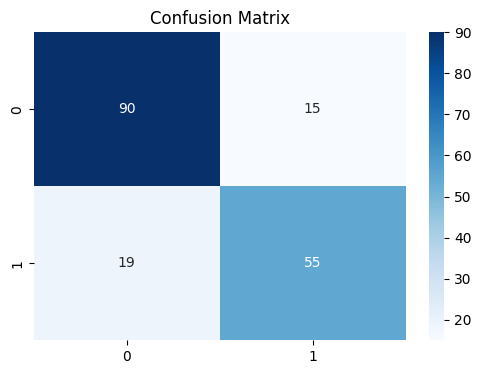

In [65]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make sure the images folder exists
os.makedirs("images", exist_ok=True)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")

# Save before showing
plt.savefig("images/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


In [26]:
# Handle missing values in test set
test["Age"].fillna(test["Age"].median())
test["Fare"].fillna(test["Fare"].median())
test["Embarked"].fillna(test["Embarked"].mode()[0])

,Embarked
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [28]:
#make predictions on test data
X_test = test.drop(columns=["PassengerId", "Name", "Ticket"])
predictions = model.predict(X_test)
#Uses the trained model to predict survival
#list/array
#0=no,1=yes

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})
#Makes a new table with exactly two columns
#PassengerId → from the test file
#Survived → your model’s prediction

submission.to_csv("submission.csv", index=False)
#Saves the file as submission.csv
#index=False → prevents pandas from adding an extra column with row numbers.

In [31]:
!ls

drive  gender_submission.csv  sample_data  submission.csv  test.csv  train.csv


Random Forest Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



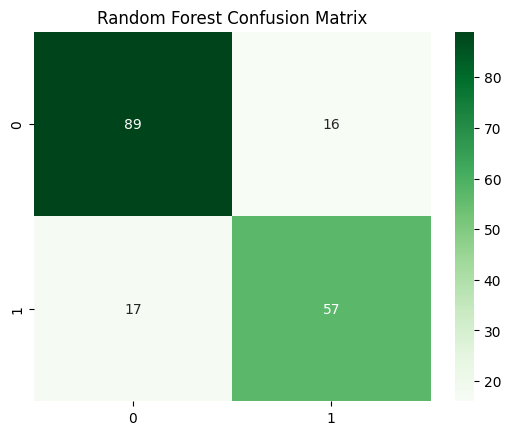

In [32]:
#Train with random forest
from sklearn.ensemble import RandomForestClassifier
#builds many decision trees and combines their predictions for better accuracy.

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
#Builds a random forest will have 200 decision trees. More trees = usually better accuracy but slower training.

# Predictions
y_pred_rf = rf_model.predict(X_val)
#the model has learned from X_train + y_train.Now it’s testing itself on X_val to see how well it can predict survival.

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
#accuracy_score → Calculates the percentage of correct predictions.
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))
#Precision → Of the ones predicted "survived," how many actually survived?
#Recall → Of the ones that actually survived, how many did we predict correctly?
#F1-score → Balance between precision and recall.
#Support → Number of actual instances in each class.

sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt="d", cmap="Greens")
#Creates a table comparing actual values (y_val) vs predicted values (y_pred_rf).
#Draws the table as a colored grid.
#annot=True → Shows the numbers inside each cell.
#fmt="d" → Formats numbers as integers.
#cmap="Greens"-Colors the heatmap in shades of green (darker = higher numbers).
plt.title("Random Forest Confusion Matrix")
plt.show()


Top-left → Number of correctly predicted non-survivors

Bottom-right → Number of correctly predicted survivors

Top-right / Bottom-left → Mistakes (wrong predictions)

Random Forest Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



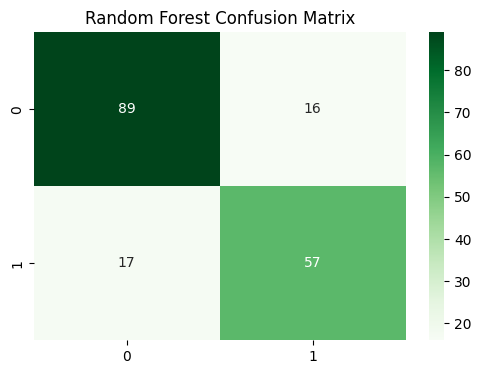

In [66]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make sure the images folder exists
os.makedirs("images", exist_ok=True)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_val)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

# Confusion Matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")

# Save before showing
plt.savefig("images/confusion_matrix_rf.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipython-input-3761492365.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance, x="Importance", y="Feature", palette="viridis") #horizontal bar chart where longer bars mean the feature was more important for the model.


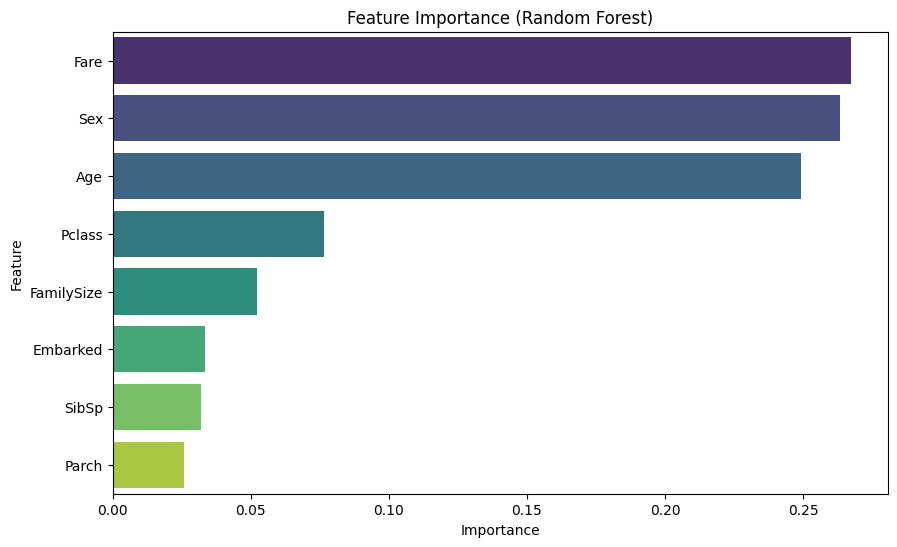

In [35]:
#feature importance
# Get feature importance
importances = rf_model.feature_importances_ #Gives a number for each feature showing how important it was in making predictions.
features = X.columns #List of feature names from your datase

# Create DataFrame-Combines feature names and importance scores into a table.
feat_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False) #Shows the most important features at the top.

# Plot
plt.figure(figsize=(10,6)) #10inches wide and 6 inches tall
sns.barplot(data=feat_importance, x="Importance", y="Feature", palette="viridis") #horizontal bar chart where longer bars mean the feature was more important for the model.
plt.title("Feature Importance (Random Forest)")
plt.show()


/tmp/ipython-input-1459116691.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance, x="Importance", y="Feature", palette="viridis")


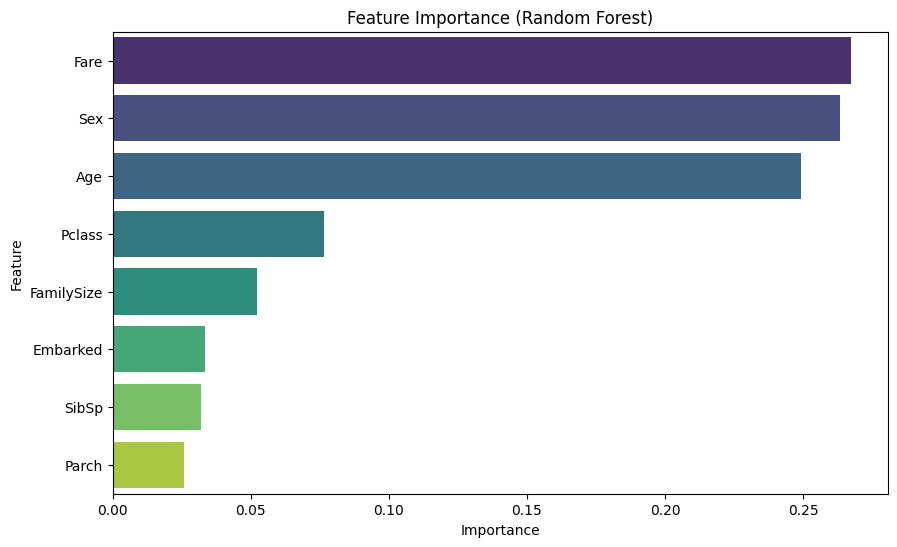

In [67]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure images folder exists
os.makedirs("images", exist_ok=True)

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame
feat_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance (Random Forest)")

# Save the plot before showing
plt.savefig("images/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()


In [36]:
#final predictions with random forest
# Train on full training set
rf_model.fit(X, y)
#you train on all training data (X + y) so the model learns from everything available.

# Predict on test set
X_test = test.drop(columns=["PassengerId", "Name", "Ticket"]) #contains only the features the model needs to make predictions.
predictions_rf = rf_model.predict(X_test) #predicts survival for each passenger in the test set

# Save submission
submission_rf = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions_rf
})

submission_rf.to_csv("submission_rf.csv", index=False)
print("Random Forest submission saved!")


Random Forest submission saved!


In [37]:
!ls

drive		       sample_data     submission_rf.csv  train.csv
gender_submission.csv  submission.csv  test.csv


*Hyperparameter turning

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

#Prepare features and target
X = train.drop(columns=["Survived", "PassengerId", "Name", "Ticket"]) #columns that will be used to predict survival
y = train["Survived"] #target variable we want to predict
X_test = test.drop(columns=["PassengerId", "Name", "Ticket"])

#Define parameter grid
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500], #number of trees
    "max_depth": [None, 5, 10, 15, 20], #maximum depth of each tree
    "min_samples_split": [2, 5, 10], #minimum samples needed to split a node
    "min_samples_leaf": [1, 2, 4],#minimum samples required at a leaf
    "max_features": ["auto", "sqrt", "log2"] #number of features considered when splitting
}

#Setup RandomizedSearchCV
rf_random = RandomizedSearchCV( #tries 30 random combinations from your parameter grid.
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,#checks model performance 5 times for each combination).
    scoring="accuracy", #chooses the combination that gives highest accuracy.
    random_state=42,
    n_jobs=-1 #uses all CPU cores for faster computation.
)

#Train on all training data
rf_random.fit(X, y)
#Finds the best parameters automatically by training  multiple Random Forests with different parameter combinations.

#Predict on test set
predictions = rf_random.best_estimator_.predict(X_test)
#Random Forest with the best parameters found

#Create submission
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission_rf_simple.csv", index=False)
print("Random Forest submission saved!")


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Random Forest submission saved!


In [39]:
!ls


drive		       sample_data     submission_rf.csv	 test.csv
gender_submission.csv  submission.csv  submission_rf_simple.csv  train.csv


XGBoost Implementation

In [40]:
#Import libraries
from xgboost import XGBClassifier #for classification
import pandas as pd

#Prepare features and target
X = train.drop(columns=["Survived", "PassengerId", "Name", "Ticket"])
y = train["Survived"]
X_test = test.drop(columns=["PassengerId", "Name", "Ticket"])

#Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=500,       # 500 trees
    max_depth=5,            # depth of each tree
    learning_rate=0.01,     # how much each tree contributes
    subsample=0.8,          # use 80% of data per tree
    colsample_bytree=0.8,   # use 80% of features per tree
    random_state=42,        # for reproducibility
    use_label_encoder=False,
    eval_metric="logloss"
)


#Train on full training data
xgb_model.fit(X, y)
#learns patterns from the full training dataset

#Predict on test set
predictions_xgb = xgb_model.predict(X_test)


#Create submission DataFrame
submission_xgb = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions_xgb
})

#Save to CSV
submission_xgb.to_csv("submission_xgb.csv", index=False)
print("XGBoost submission saved!")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:48:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost submission saved!


In [41]:
!ls

drive		       submission.csv		 submission_xgb.csv
gender_submission.csv  submission_rf.csv	 test.csv
sample_data	       submission_rf_simple.csv  train.csv


<Figure size 1000x600 with 0 Axes>

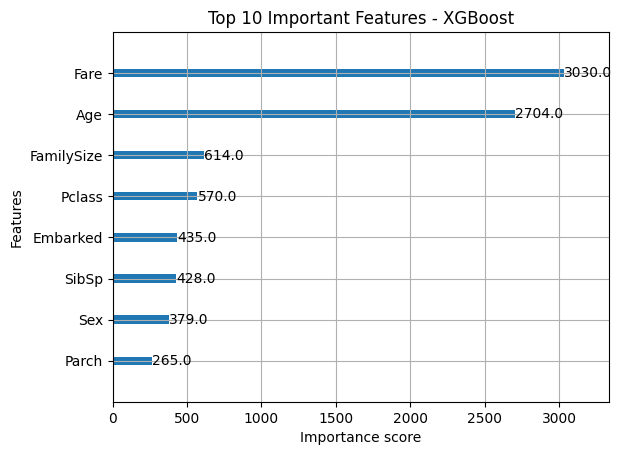

In [42]:
#feature importance (xgboost)
from xgboost import plot_importance #visualize feature importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type="weight", max_num_features=10) #measures importance by number of times a feature is used to split nodes in trees.shows only the top 10 most important features.
plt.title("Top 10 Important Features - XGBoost")
plt.show()


In [43]:
#Final submission(XGBoost)
# Train on full training data
xgb_model.fit(X, y) #Uses all the training data (X = features, y = target) to teach the XGBoost model.

# Predict test set
predictions_xgb = xgb_model.predict(X_test) #predicts whether each passenger survived (1) or not (0) in the test set.

# Save submission
submission_xgb = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions_xgb
})

submission_xgb.to_csv("submission_xgb.csv", index=False)
print("XGBoost submission saved!")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:54:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost submission saved!


In [44]:
!ls


drive		       submission.csv		 submission_xgb.csv
gender_submission.csv  submission_rf.csv	 test.csv
sample_data	       submission_rf_simple.csv  train.csv


In [45]:
y_pred_val = xgb_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))


Validation Accuracy: 0.88268156424581


In [52]:
!ls


drive		       sample_data	  submission_rf_simple.csv  train.csv
gender_submission.csv  submission.csv	  submission_xgb.csv
images		       submission_rf.csv  test.csv
